<a href="https://colab.research.google.com/github/fadlymuham1/marketing_mix_model/blob/main/marketing_mix_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('/content/drive/MyDrive/Arsip Pendidikan/Python Projects/Marketing Mix Modelling/marketing_dataset2.csv') #source https://www.kaggle.com/datasets/orosas/marketing-mix-dataset?resource=download

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        200 non-null    object 
 1   TikTok      200 non-null    float64
 2   Facebook    200 non-null    float64
 3   Google Ads  200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [51]:
data.head()

,Date,TikTok,Facebook,Google Ads,Sales
0,1/7/2018,13528.1,0.00,0.00,9779.80
1,1/14/2018,0.0,5349.65,2218.93,13245.19
2,1/21/2018,0.0,4235.86,2046.96,12022.66
3,1/28/2018,0.0,3562.21,0.00,8846.95
4,2/4/2018,0.0,0.00,2187.29,9797.07


In [93]:
data.sum(axis = 0)

TikTok         589241.53
Facebook       442717.01
Google Ads     304144.51
Sales         2133628.30
month            1269.00
dtype: float64

In [52]:
data.isnull().sum()

Date          0
TikTok        0
Facebook      0
Google Ads    0
Sales         0
dtype: int64

In [53]:
#prepare
data['Calendar_Week'] = pd.to_datetime(data['Date'])
data = data.drop(['Date'],axis = 1)
data = data.sort_values(by ='Calendar_Week')
data['month'] = data['Calendar_Week'].dt.month
data.set_index('Calendar_Week',inplace = True)


In [54]:
data.head()

,TikTok,Facebook,Google Ads,Sales,month
Calendar_Week,,,,,
2018-01-07,13528.1,0.00,0.00,9779.80,1
2018-01-14,0.0,5349.65,2218.93,13245.19,1
2018-01-21,0.0,4235.86,2046.96,12022.66,1
2018-01-28,0.0,3562.21,0.00,8846.95,1
2018-02-04,0.0,0.00,2187.29,9797.07,2


In [55]:
print(len(data))

200


In [60]:
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1f K" % (x/1E3)

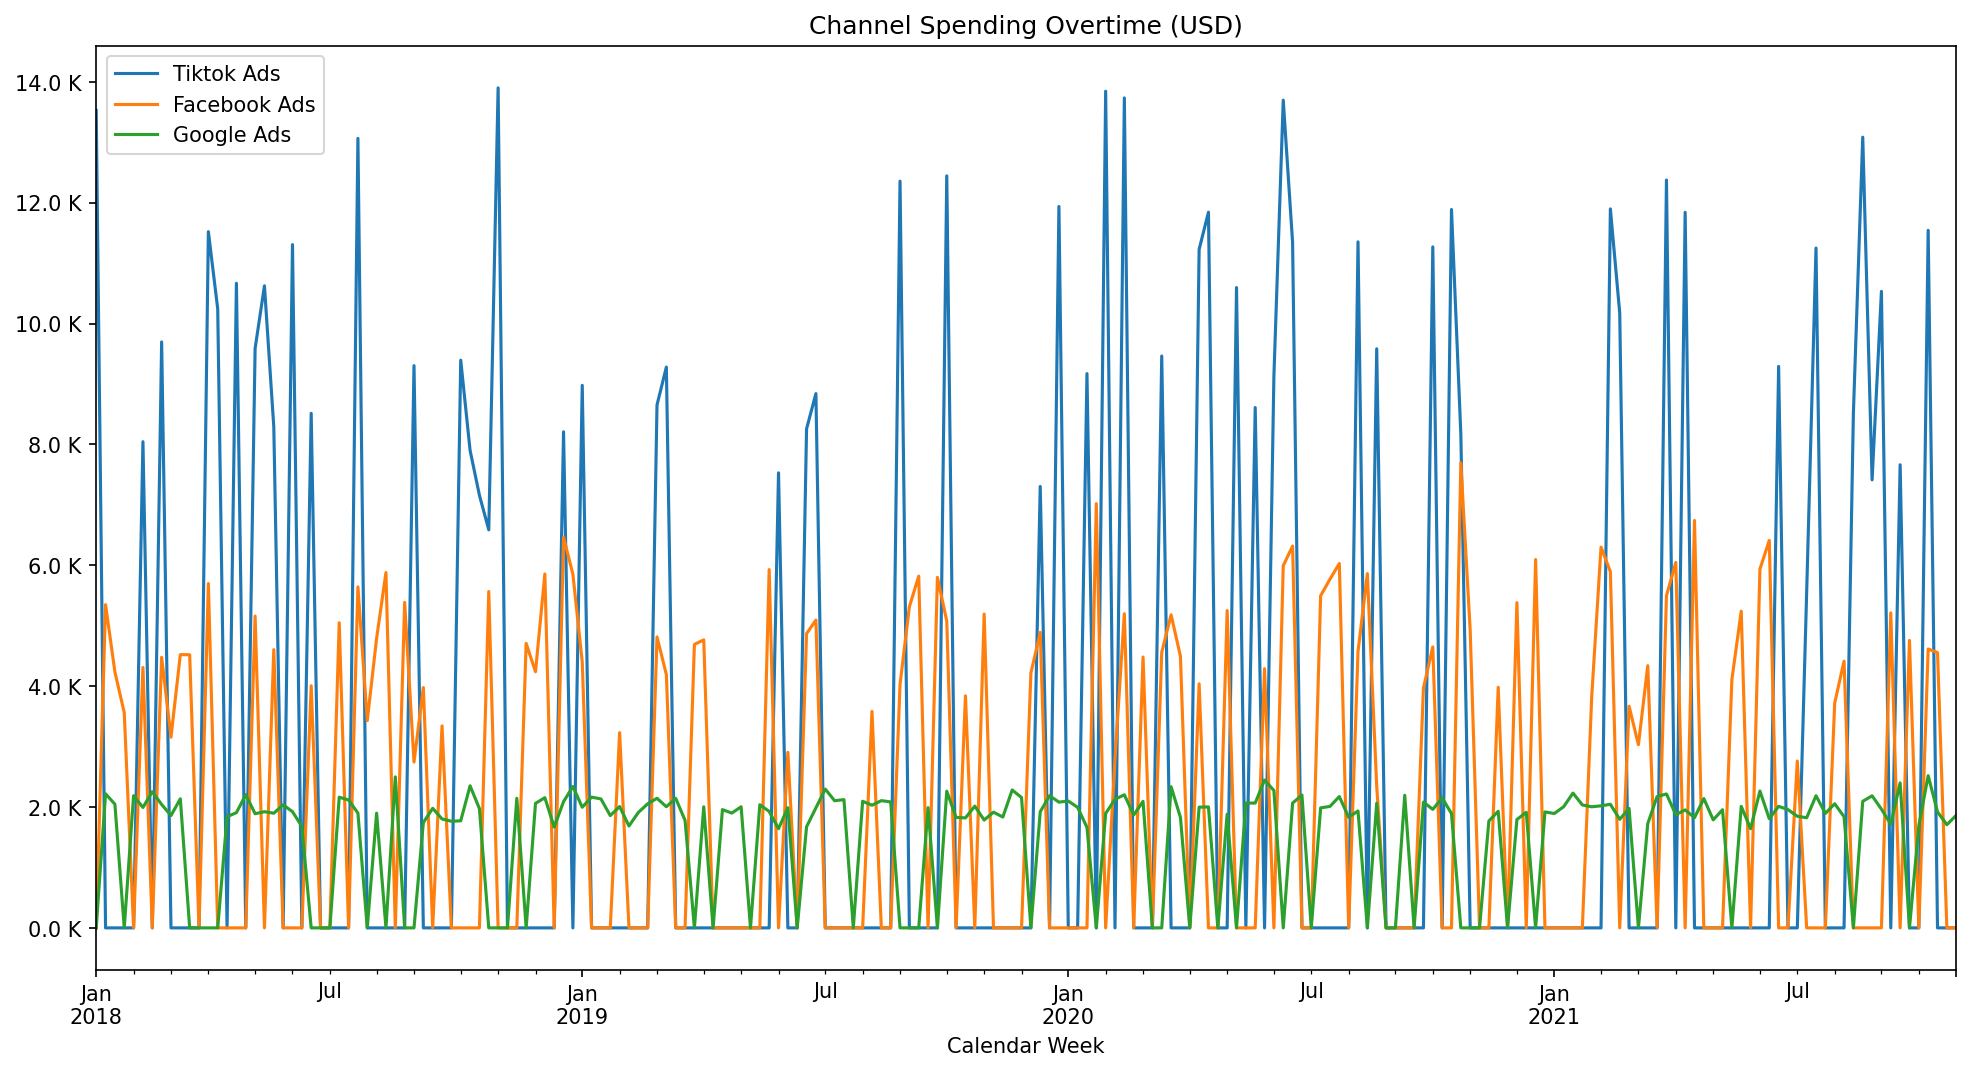

In [62]:
# to set the plot size
# plt.figure(figsize=(16, 8), dpi=150)
fig, ax = plt.subplots(figsize=(16, 8), dpi=150)
# in plot method we set the label and color of the curve.
data[ "TikTok"].plot(label='Tiktok Ads')
data[ "Facebook"].plot(label='Facebook Ads')
data[ "Google Ads"].plot(label='Google Ads')
  
# Set the y-axis formatter to million_formatter
ax.yaxis.set_major_formatter(million_formatter)

# adding title to the plot
plt.title('Channel Spending Overtime (USD)')
  
# adding Label to the x-axis
plt.xlabel('Calendar Week')
  
# adding legend to the curve
plt.legend()

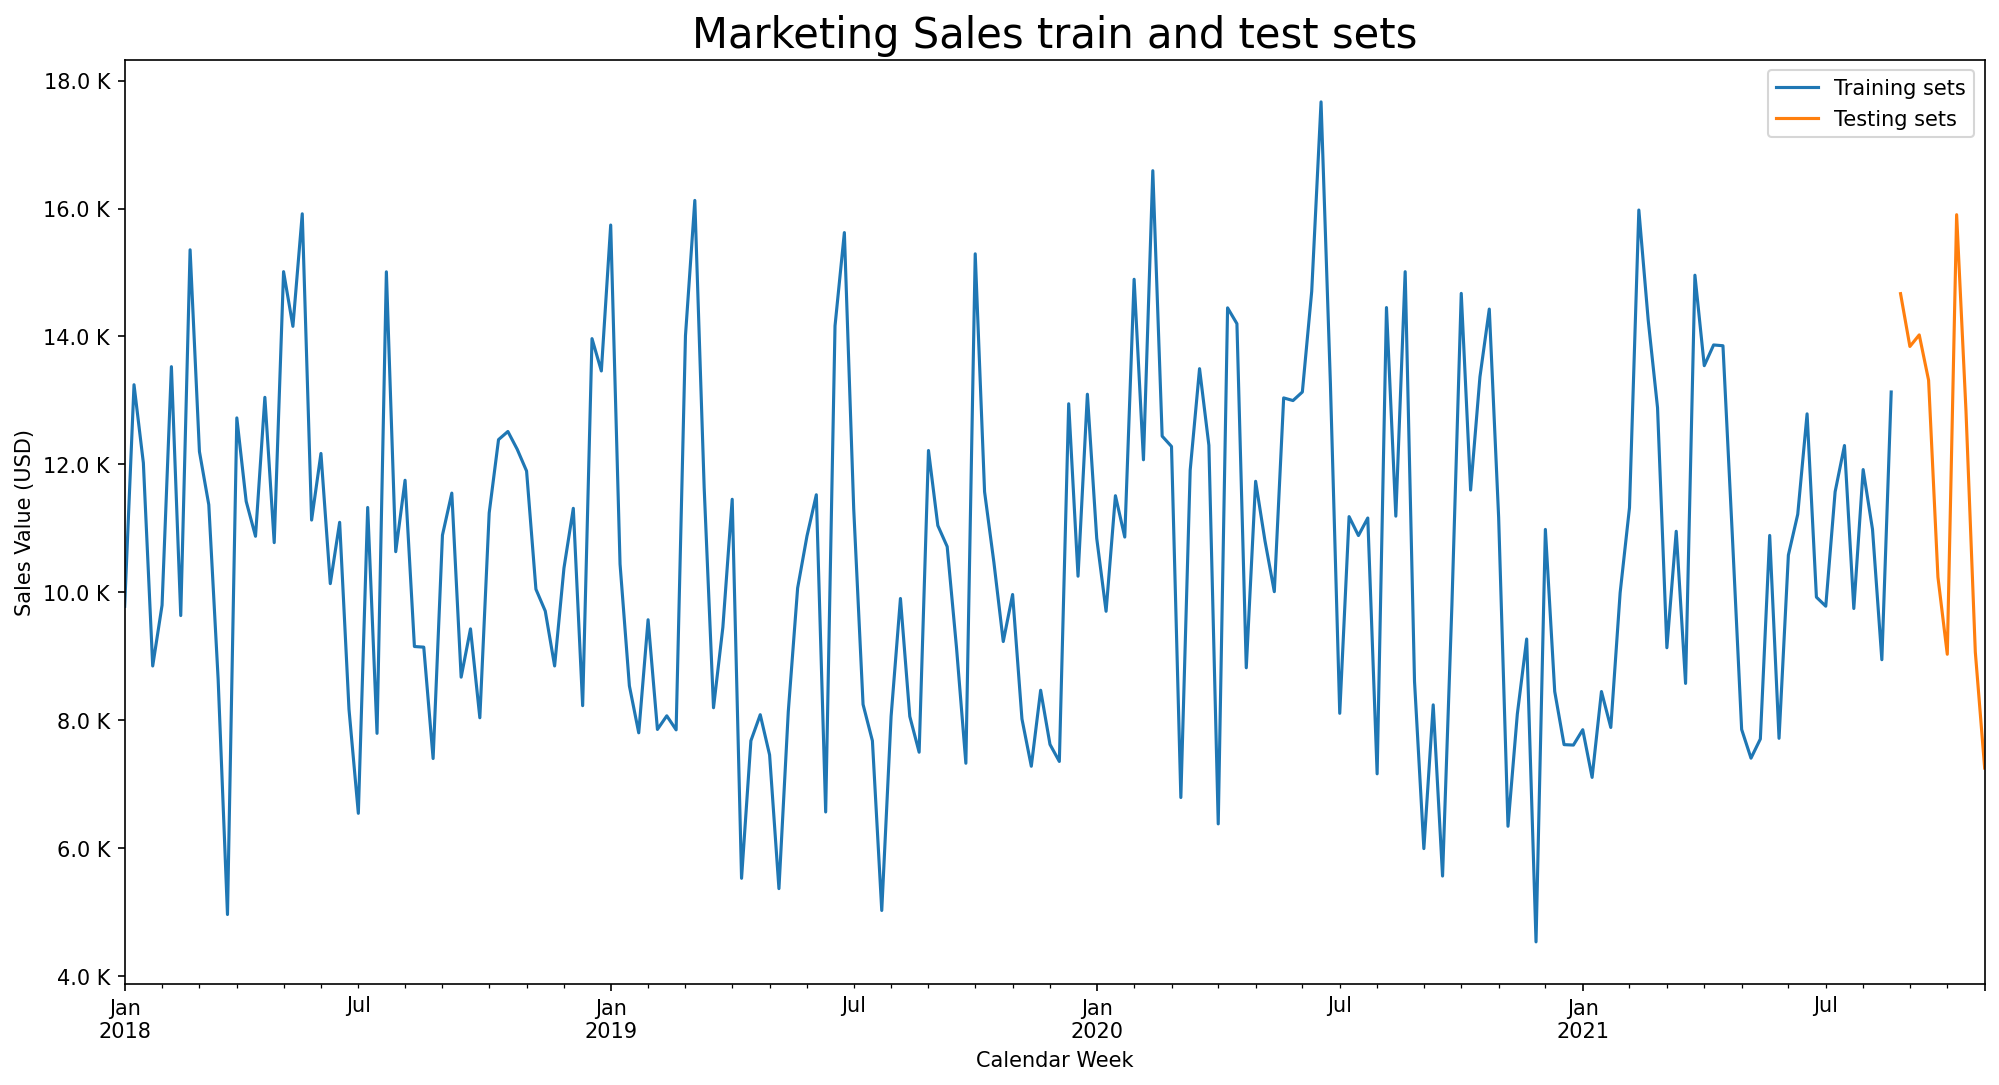

In [63]:
test_size = 10
fig, ax = plt.subplots(figsize=(16, 8), dpi=150)
df_train = data[:-test_size].copy()
df_test = data[-test_size:].copy()

plt.title('Marketing Sales train and test sets', size=20)

df_train[ "Sales"].plot(label='Training sets')
df_test[ "Sales"].plot(label='Testing sets')
plt.xlabel("Calendar Week")
plt.ylabel("Sales Value (USD)")
ax.yaxis.set_major_formatter(million_formatter)
plt.legend();

In [64]:
#training process
x_train = df_train.drop(columns=['Sales'])
y_train = df_train['Sales']

In [14]:
!pip install mamimo==0.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from mamimo.carryover import ExponentialCarryover
from mamimo.saturation import ExponentialSaturation
from mamimo.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

cats =  [list(range(1, 13))] # different months, known beforehand

adstock = ColumnTransformer(
    [('tiktok_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
     ]), ['TikTok']),
     ('facebook_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
     ]), ['Facebook']),
     ('googleads_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
     ]), ['Google Ads']),
     ('month', OneHotEncoder(sparse_output=False, categories=cats), ['month']),
  
    ]
)

model = Pipeline([
    ('preprocess', adstock),
    ('regression', LinearRegression(positive=True,fit_intercept=False))
])

In [66]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('tiktok_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['TikTok']),
                                                 ('facebook_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Facebook']),
                                                 ('googleads_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Google Ads']),
                                                 ('month',
                                                  OneHotEncoder(categories=[[1,
                                                                             2,
                                                                             3,
                                                                             4,
                                                                             5,
                                                                             6,
                                                                             7,
                                                                             8,
                                                                             9,
                                                                             10,
                                                                             11,
                                                                             12]],
                                                                sparse_output=False),
                                                  ['month'])])),
                ('regression',
                 LinearRegression(fit_intercept=False, positive=True))])

In [67]:
model.score(x_train,y_train)

0.7796848964354803

In [68]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

tuned_model = RandomizedSearchCV(
    model,
    param_distributions={
        'preprocess__tiktok_pipe__carryover__window': randint(1, 10),
        'preprocess__tiktok_pipe__carryover__strength': uniform(0, 1),
        'preprocess__tiktok_pipe__saturation__exponent': uniform(0, 1),
        'preprocess__facebook_pipe__carryover__window': randint(1, 10),
        'preprocess__facebook_pipe__carryover__strength': uniform(0, 1),
        'preprocess__facebook_pipe__saturation__exponent': uniform(0, 1),
        'preprocess__googleads_pipe__carryover__window': randint(1, 10),
        'preprocess__googleads_pipe__carryover__strength': uniform(0, 1),
        'preprocess__googleads_pipe__saturation__exponent': uniform(0, 1),
        'regression__alpha':uniform(0, 1),
        'regression__l1_ratio':uniform(0, 1),
    
    },
    cv=TimeSeriesSplit(),
    random_state=33,
    n_iter=1000, # can take some time, lower number for faster results
)

tuned_model.fit(x_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('tiktok_pipe',
                                                                               Pipeline(steps=[('carryover',
                                                                                                ExponentialCarryover()),
                                                                                               ('saturation',
                                                                                                ExponentialSaturation())]),
                                                                               ['TikTok']),
                                                                              ('facebook_pipe',
                                                                               Pipeline(steps=[('carryover',
                                                                                                ExponentialCarryover...
                                        'preprocess__tiktok_pipe__carryover__window': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff534aa78e0>,
                                        'preprocess__tiktok_pipe__saturation__exponent': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff534aa7ee0>,
                                        'regression__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff5375f5330>,
                                        'regression__l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff534b4c310>},
                   random_state=33)

In [69]:
tuned_model.score(x_train,y_train)

0.6822347693529551

In [70]:
y_train_predict = tuned_model.predict(x_train)

In [71]:
# test set
x_test = df_test.drop(columns=['Sales'])
y_test = df_test['Sales']

In [72]:
tuned_model.score(x_test,y_test)

0.3553348487609972

In [73]:
y_test_predict = tuned_model.predict(x_test)

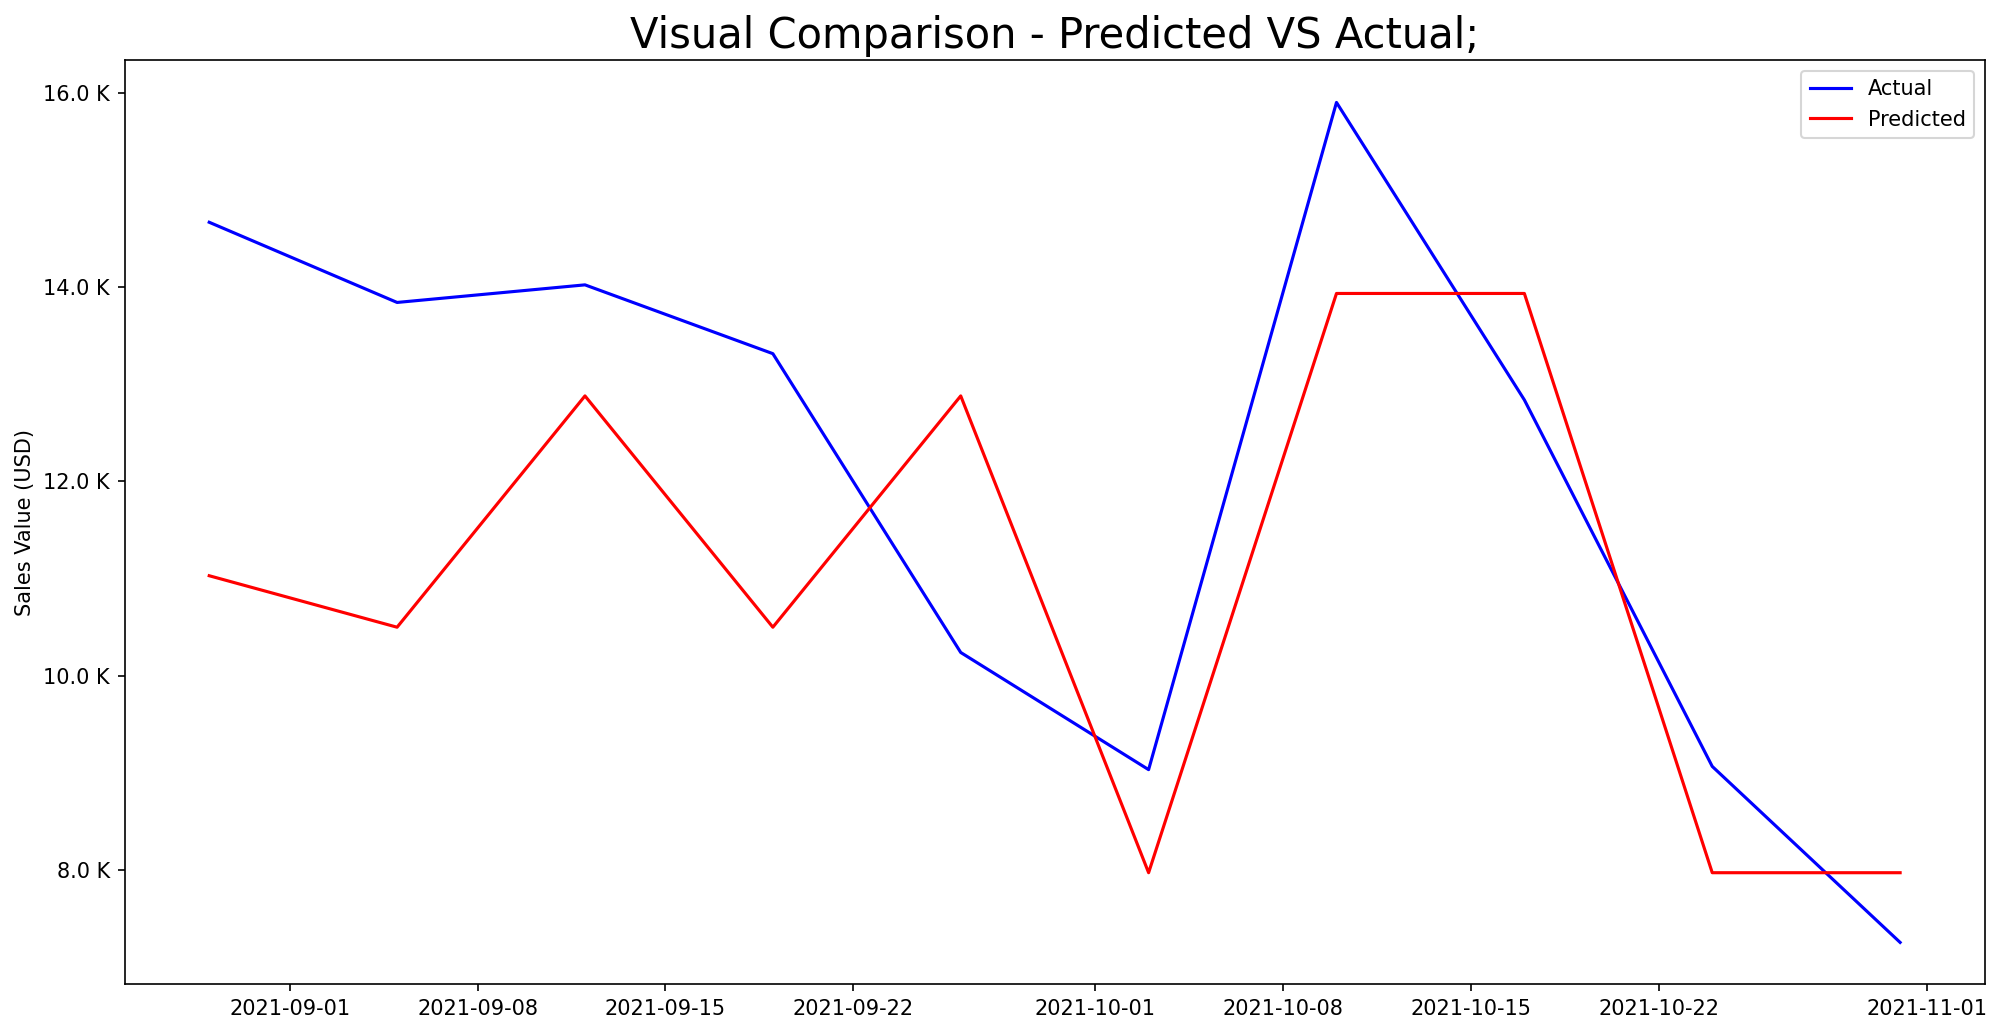

In [74]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=150)

plt.title('Visual Comparison - Predicted VS Actual;', size=20)

# Plot actual values in blue
plt.plot(y_test, color='blue', label='Actual')

# Plot predicted values in red
y_test_predict_df = pd.DataFrame(y_test_predict, index=y_test.index, columns=['Sales'])
plt.plot(y_test_predict_df, color='red', label='Predicted')

# plt.xlabel("Calendar Week")
plt.ylabel("Sales Value (USD)")
ax.yaxis.set_major_formatter(million_formatter)
plt.legend();

test set only 10 data points, understandable if it is very low in score. I decided to maximize the data as training set.

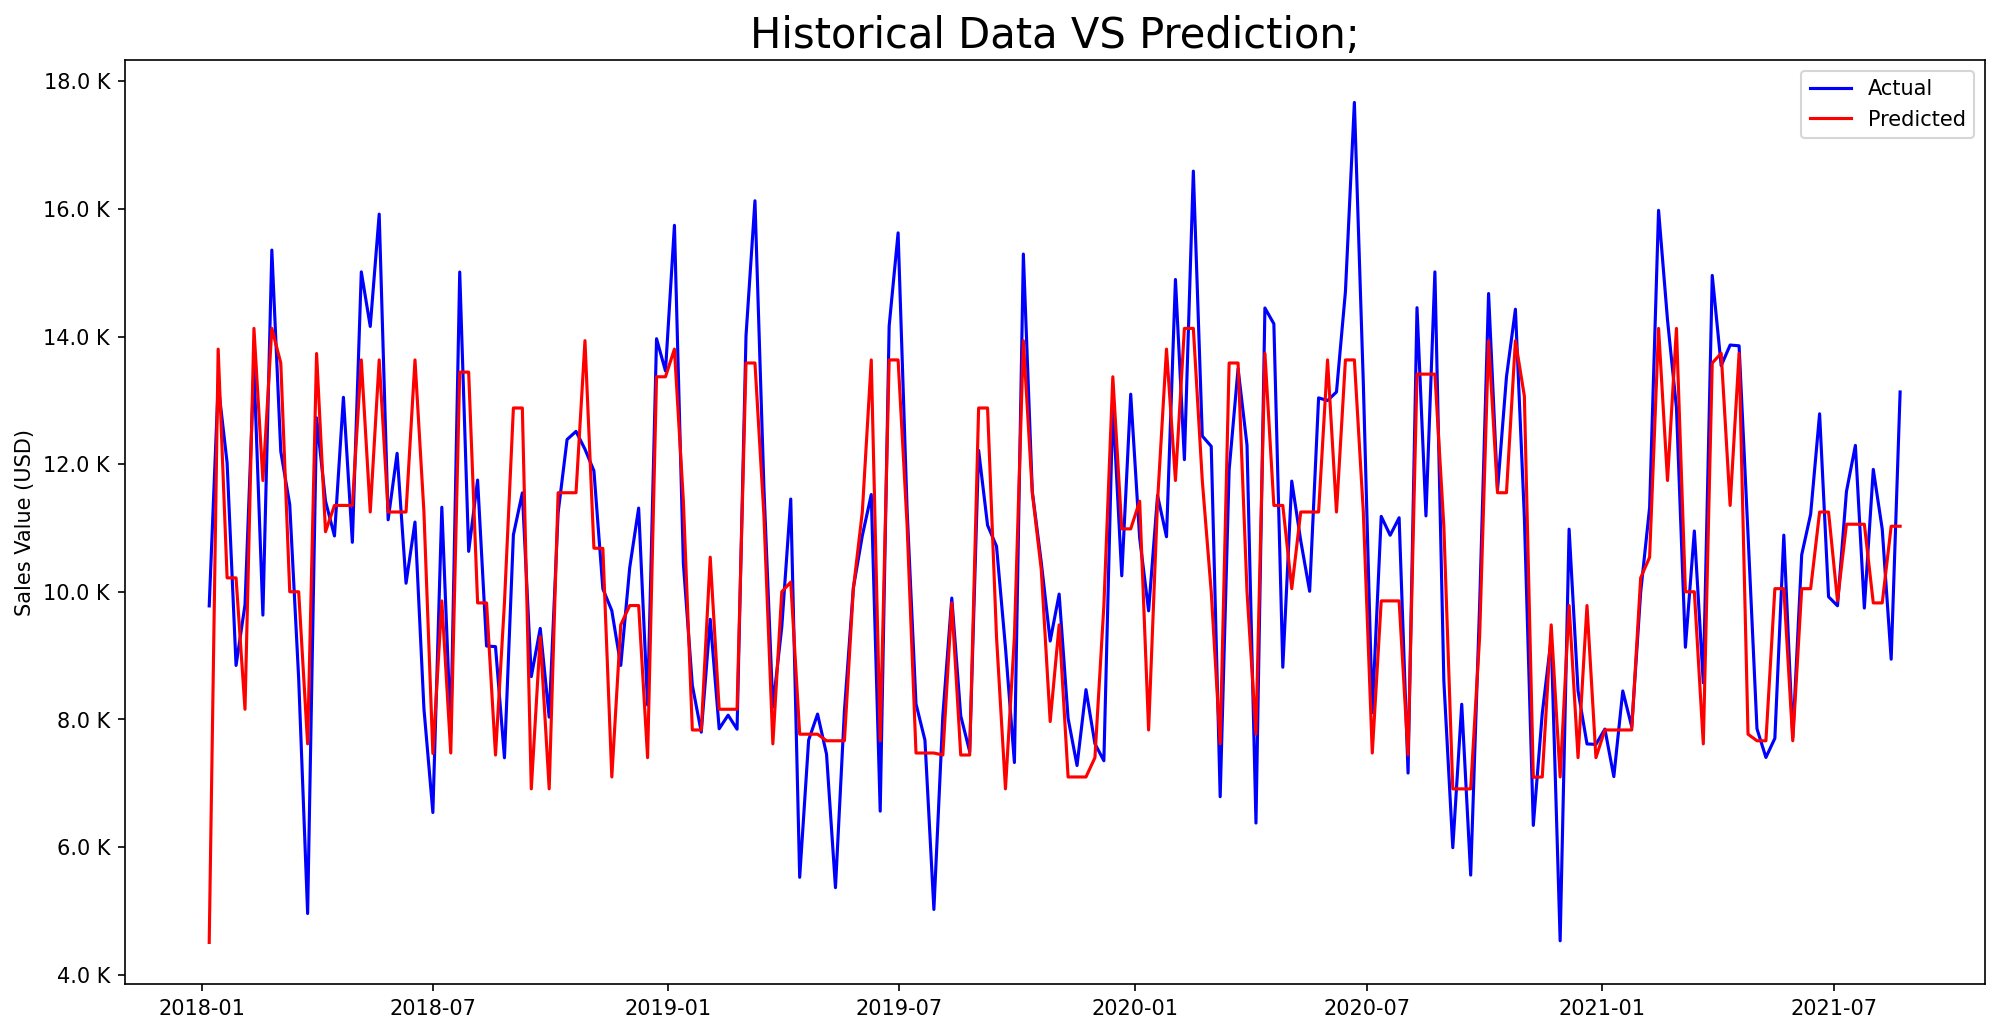

In [75]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=150)

plt.title('Historical Data VS Prediction;', size=20)

# Plot actual values in blue
plt.plot(y_train, color='blue', label='Actual')

# Plot predicted values in red
y_train_predict_df = pd.DataFrame(y_train_predict, index=y_train.index, columns=['Sales'])
plt.plot(y_train_predict_df, color='red', label='Predicted')

# plt.xlabel("Calendar Week")
plt.ylabel("Sales Value (USD)")
ax.yaxis.set_major_formatter(million_formatter)
plt.legend();

The model seems capture seasonality well as well

In [76]:
from typing import Dict, List, Optional

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline


def breakdown(
    model: Pipeline,
    X: pd.DataFrame,
    y: np.ndarray,
    group_channels: Optional[Dict[str, List[str]]] = None,
):
    """
    Compute the contributions for each channel.
    Parameters
    ----------
    model : sklearn.pipeline.Pipeline
        The trained marketing mix model. Should be a pipeline consisting of two steps:
        1. preprocessing (e.g. adstock transformations)
        2. regression via a linear model.
    X : pd.Dataframe of shape (n_samples, n_features)
        The training data.
    y : np.ndarray, 1-dimensional
        The training labels.
    group_channels : Dict[str, List[str]], default=None
        Create new channels by grouping (i.e. summing) the channels in the input.
    Returns
    -------
    pd.DataFrame
        A table consisting of the contributions of each channel in each timestep.
        The row-wise sum of this dataframe equals `y`.
    """
    preprocessing = model.steps[-2][1]
    regression = model.steps[-1][1]
    channel_names = preprocessing.get_feature_names_out()

    after_preprocessing = pd.DataFrame(
        preprocessing.transform(X), columns=channel_names, index=X.index
    )

    regression_weights = pd.Series(regression.coef_, index=channel_names)

    base = regression.intercept_

    unadjusted_breakdown = after_preprocessing.mul(regression_weights).assign(Base=base)
    adjusted_breakdown = unadjusted_breakdown.div(
        unadjusted_breakdown.sum(axis=1), axis=0
    ).mul(y, axis=0)

    if group_channels is not None:
        for new_channel, old_channels in group_channels.items():
            adjusted_breakdown[new_channel] = sum(
                [adjusted_breakdown.pop(old_channel) for old_channel in old_channels]
            )

    return adjusted_breakdown

In [77]:
contributions = breakdown(tuned_model.best_estimator_, x_train, y_train)

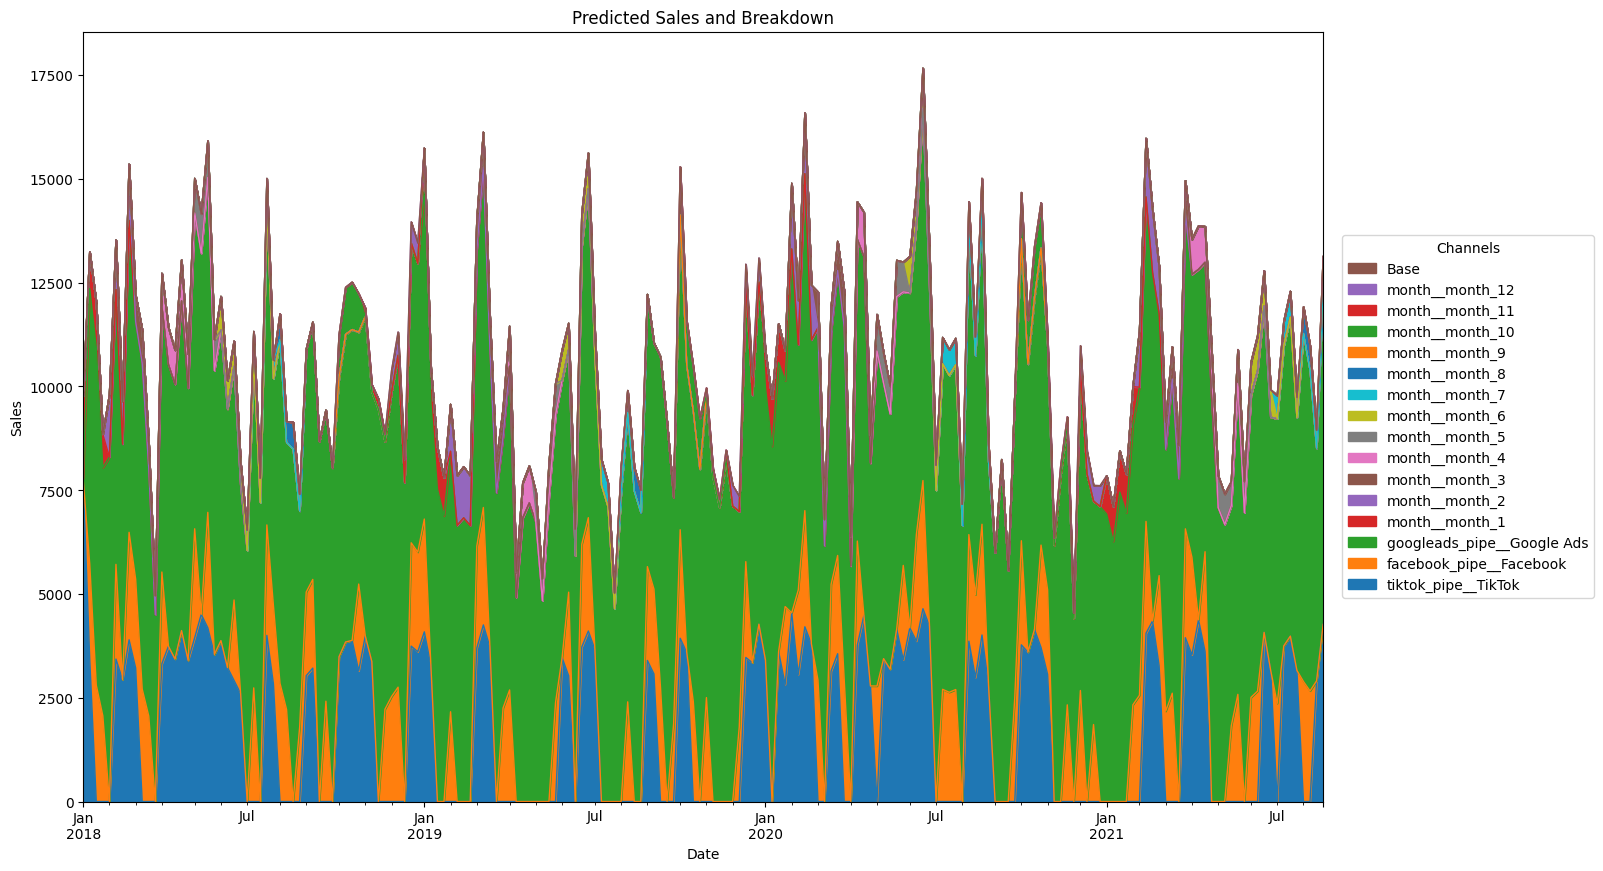

In [78]:
ax = contributions.plot.area(
    figsize=(16, 10),
    linewidth=1,
    title="Predicted Sales and Breakdown",
    ylabel="Sales",
    xlabel="Date",
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],
    labels[::-1],
    title="Channels",
    loc="center left",
    bbox_to_anchor=(1.01, 0.5),
)

In [79]:
group_channels = {'Baseline': [f'month__month_{i}' for i in range(1, 13)] + ['Base']} 
# read: 'Baseline consists of the months, base and trend.'
# You can add more groups!

contributions = breakdown(
    tuned_model.best_estimator_,
    x_train,
    y_train,
    group_channels
)

In [80]:
contributions.rename(
    columns = {
        'tiktok_pipe__TikTok':'Tiktok Ads',
        'facebook_pipe__Facebook': 'Facebook Ads',
        'googleads_pipe__Google Ads':'Google Ads',



    }
    , inplace = True
)

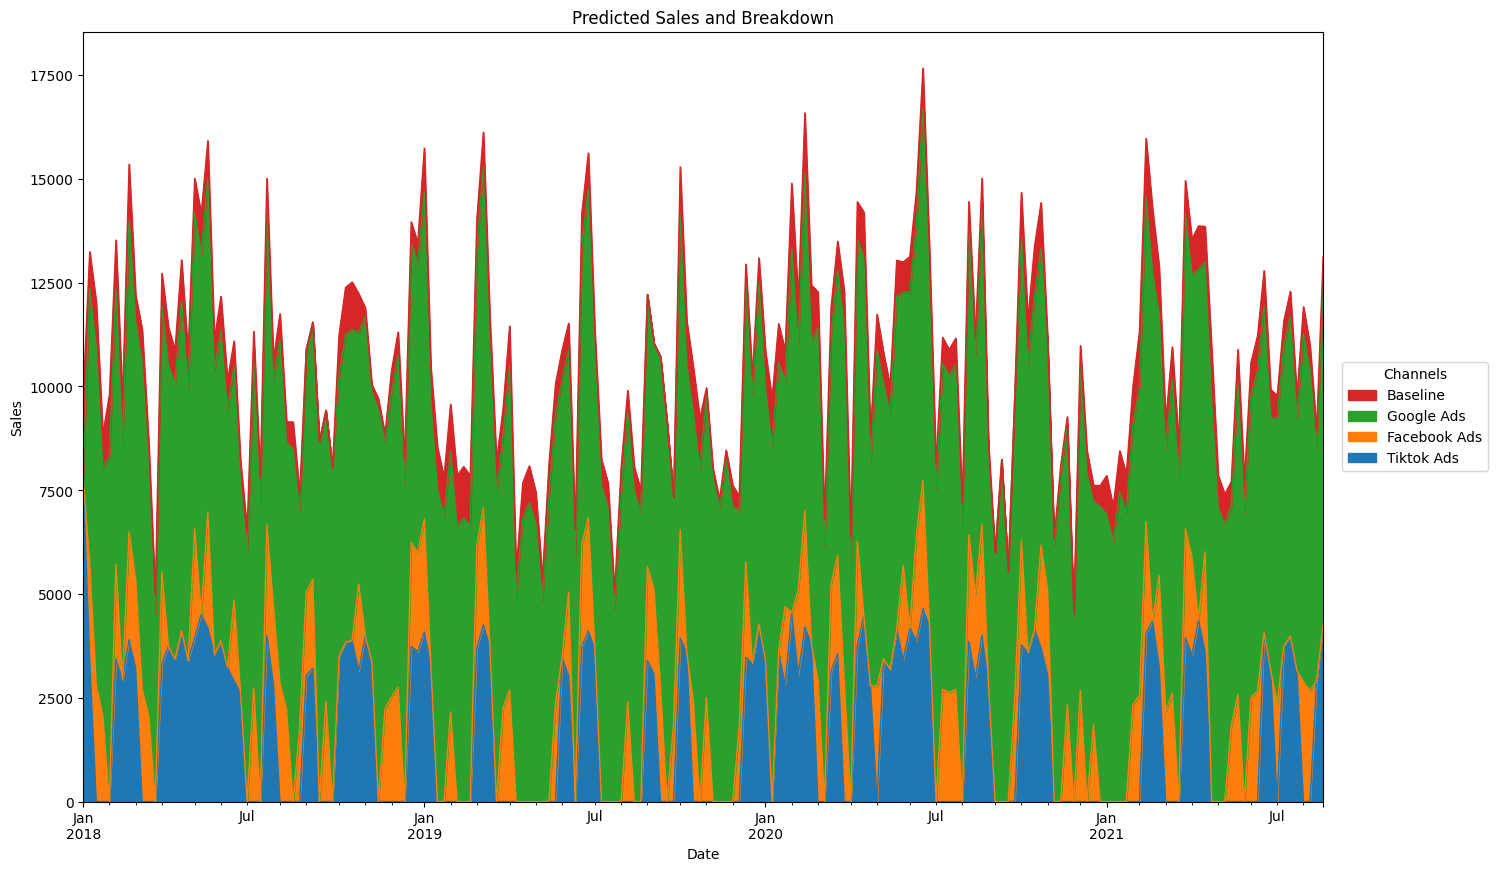

In [81]:
ax = contributions.plot.area(
    figsize=(16, 10),
    linewidth=1,
    title="Predicted Sales and Breakdown",
    ylabel="Sales",
    xlabel="Date",
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],
    labels[::-1],
    title="Channels",
    loc="center left",
    bbox_to_anchor=(1.01, 0.5),
)

Real life case need more data points to be effective

In [82]:
contributions

,Tiktok Ads,Facebook Ads,Google Ads,Baseline
Calendar_Week,,,,
2018-01-07,7777.474219,0.000000,0.000000,2002.325781
2018-01-14,3439.505485,2286.737411,6633.439765,885.507340
2018-01-21,0.000000,2803.747802,8133.199757,1085.712441
2018-01-28,0.000000,2063.155459,5984.866210,798.928330
2018-02-04,0.000000,0.000000,8299.753208,1497.316792
...,...,...,...,...
2021-07-25,3158.755802,0.000000,6091.985152,495.159046
2021-08-01,0.000000,2890.433618,8384.660697,643.315685
2021-08-08,0.000000,2663.676497,7726.876513,592.846990


In [83]:
contributions['all_column'] = contributions[contributions.columns.tolist()].sum(axis = 1)

In [84]:
contributions.head()

,Tiktok Ads,Facebook Ads,Google Ads,Baseline,all_column
Calendar_Week,,,,,
2018-01-07,7777.474219,0.000000,0.000000,2002.325781,9779.80
2018-01-14,3439.505485,2286.737411,6633.439765,885.507340,13245.19
2018-01-21,0.000000,2803.747802,8133.199757,1085.712441,12022.66
2018-01-28,0.000000,2063.155459,5984.866210,798.928330,8846.95
2018-02-04,0.000000,0.000000,8299.753208,1497.316792,9797.07


In [85]:
#Revenue Proportion
for channel in contributions.columns.tolist():
    roi = contributions[channel].sum() / contributions['all_column'].sum()
    print(f'{channel}: {roi:.2f}')

Tiktok Ads: 0.17
Facebook Ads: 0.11
Google Ads: 0.66
Baseline: 0.07
all_column: 1.00


In [94]:
x_train.columns

Index(['TikTok', 'Facebook', 'Google Ads', 'month'], dtype='object')

In [99]:
contributions.rename(
    columns = {
        'Tiktok Ads':'TikTok',
        'Facebook Ads': 'Facebook',
        



    }
    , inplace = True
)

In [104]:
#ROI
for channel in ['TikTok','Facebook','Google Ads']:
    roi = contributions[channel].sum() / x_train[channel].sum()
    print(f'{channel}: {roi:.2f}')

TikTok: 0.61
Facebook: 0.50
Google Ads: 4.66


In [87]:
print(tuned_model.best_params_)

{'preprocess__facebook_pipe__carryover__strength': 0.08728682873038895, 'preprocess__facebook_pipe__carryover__window': 1, 'preprocess__facebook_pipe__saturation__exponent': 0.35887731789800037, 'preprocess__googleads_pipe__carryover__strength': 0.4048841265137907, 'preprocess__googleads_pipe__carryover__window': 6, 'preprocess__googleads_pipe__saturation__exponent': 0.06075971796908419, 'preprocess__tiktok_pipe__carryover__strength': 0.6078453062837672, 'preprocess__tiktok_pipe__carryover__window': 2, 'preprocess__tiktok_pipe__saturation__exponent': 0.22400617960986402, 'regression__alpha': 0.4783918106060625, 'regression__l1_ratio': 0.9422820328229973}


In [91]:
for k, v in tuned_model.best_params_.items():
  print(k,":")
  print(v)

preprocess__facebook_pipe__carryover__strength :
0.08728682873038895
preprocess__facebook_pipe__carryover__window :
1
preprocess__facebook_pipe__saturation__exponent :
0.35887731789800037
preprocess__googleads_pipe__carryover__strength :
0.4048841265137907
preprocess__googleads_pipe__carryover__window :
6
preprocess__googleads_pipe__saturation__exponent :
0.06075971796908419
preprocess__tiktok_pipe__carryover__strength :
0.6078453062837672
preprocess__tiktok_pipe__carryover__window :
2
preprocess__tiktok_pipe__saturation__exponent :
0.22400617960986402
regression__alpha :
0.4783918106060625
regression__l1_ratio :
0.9422820328229973
